# Import Librarys and Files

In [1]:
import ROOT as r
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
from tqdm.notebook import tqdm 

import utils.utils as utils
import utils.plotting_utils as plotting_utils
from models.event_patterns import EventPatterns
from models.pattern import Pattern
from models.vertex import Vertex
from models.tracklet import Tracklet
from models.hit import Hit
from algorithms.pattern_finding_helpers import PatternFindingHelpers

In [2]:
PI_ROOT_DICT_PATH = "/home/jack/large_projects/simulation/install/lib/libPiRootDict.so" #Change to match system path
r.gSystem.Load(PI_ROOT_DICT_PATH)

0

In [3]:
file_pattern_finding = "/home/jack/large_projects/simulation/workspace/playground/reco_tests/all_rec_pimunu_algor.root"  # CHANGE THIS
file_truth_pattern_finding = "/home/jack/large_projects/simulation/workspace/playground/reco_tests/all_rec_pimunu_truth.root"  # CHANGE THIS

# Print creation time for each file
utils.print_file_creation_time(file_pattern_finding)
utils.print_file_creation_time(file_truth_pattern_finding)

file_pf=r.TFile(file_pattern_finding,"READ")
file_truth_pf=r.TFile(file_truth_pattern_finding,"READ")


The file '/home/jack/large_projects/simulation/workspace/playground/reco_tests/all_rec_pimunu_algor.root' was created on: 2025-04-07 00:54:16
The file '/home/jack/large_projects/simulation/workspace/playground/reco_tests/all_rec_pimunu_truth.root' was created on: 2025-04-07 00:54:16


# Create Python Structure from Event Data

## Create tracklets for an event

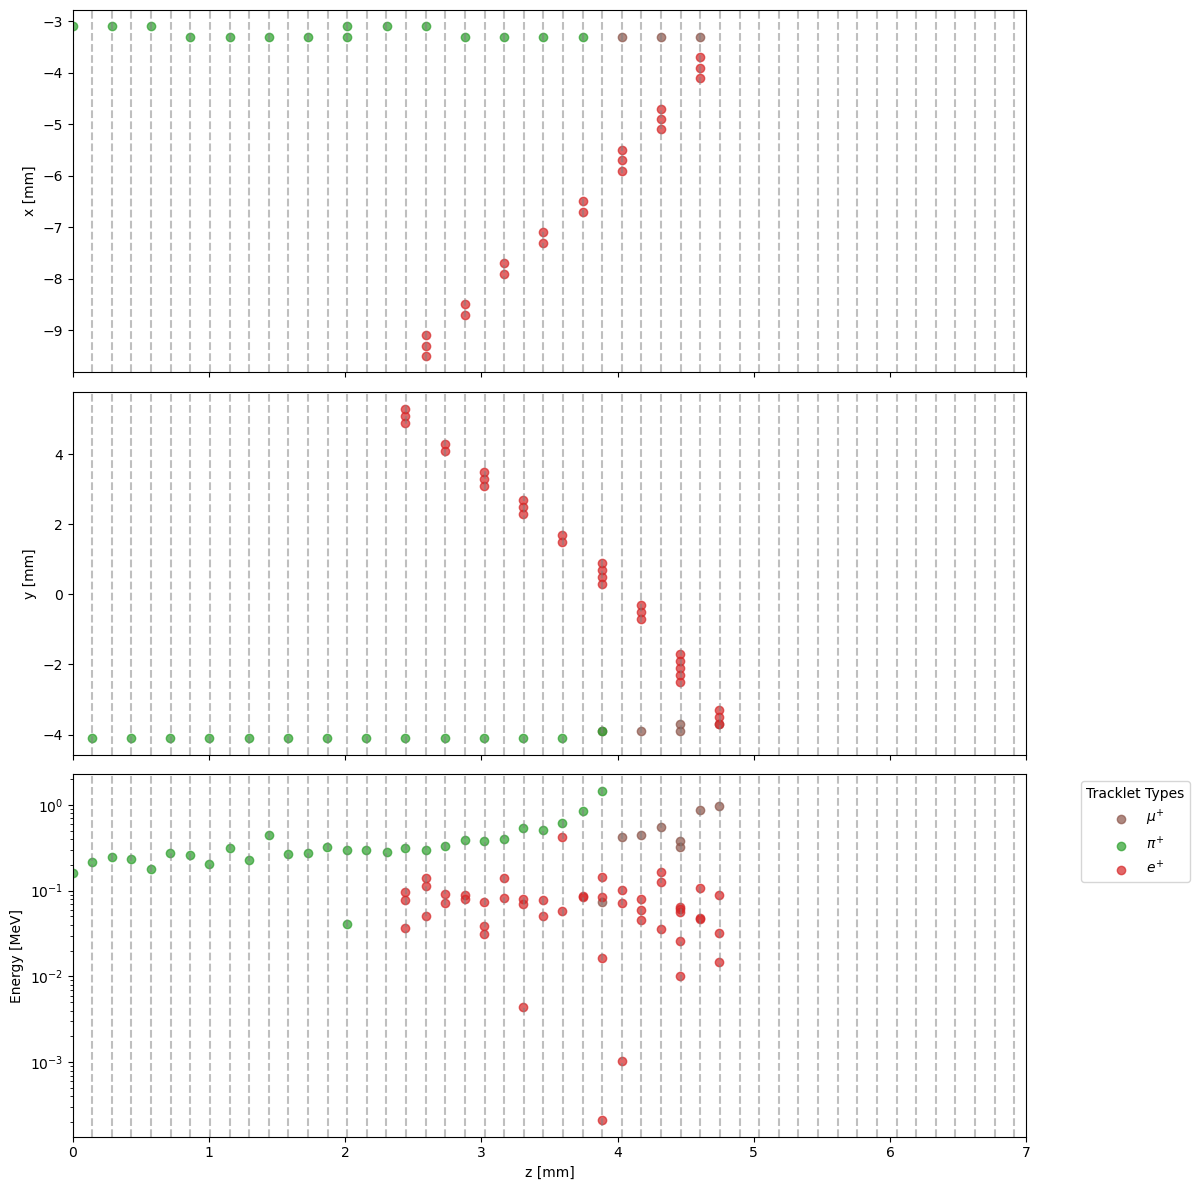

(<Figure size 1200x1200 with 3 Axes>,
 array([<Axes: ylabel='x [mm]'>, <Axes: ylabel='y [mm]'>,
        <Axes: xlabel='z [mm]', ylabel='Energy [MeV]'>], dtype=object))

In [4]:
# Initialize Helper Class without pattern forming and vertex forming algorithms(we'll add them later)
pf_helpers = PatternFindingHelpers(None, None)

# Create tracklet objects for an event
tracklets = pf_helpers.create_tracklets(file_pf, 0)

# Plot the tracklets
reload(plotting_utils)
plotting_utils.plot_tracklets(tracklets)

## Create Vertices from Tracklets

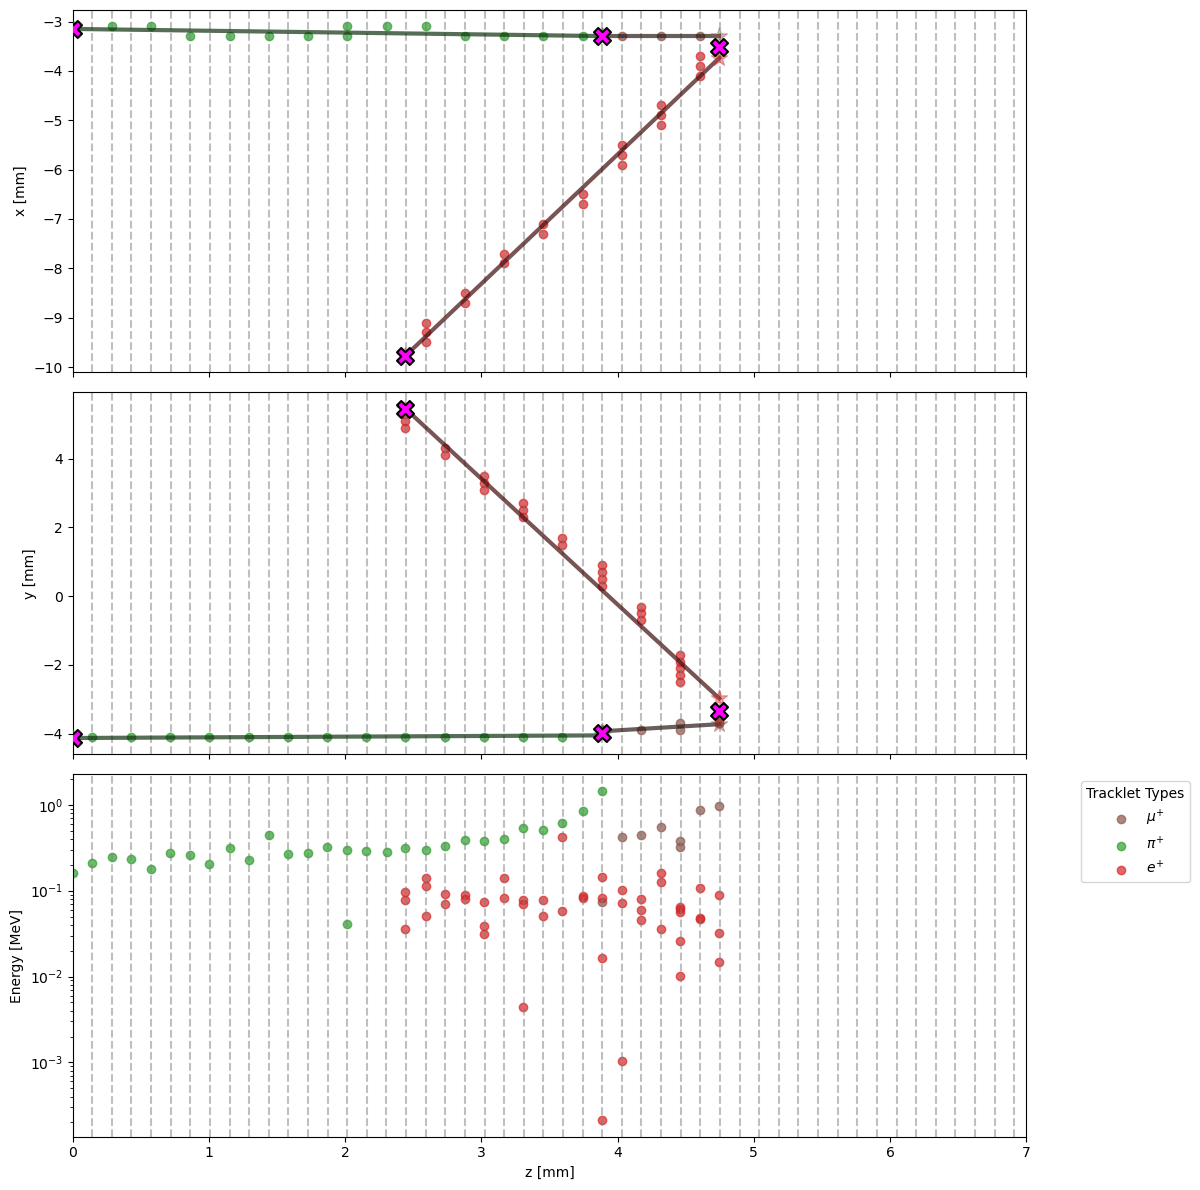

(<Figure size 1200x1200 with 3 Axes>,
 array([<Axes: ylabel='x [mm]'>, <Axes: ylabel='y [mm]'>,
        <Axes: xlabel='z [mm]', ylabel='Energy [MeV]'>], dtype=object))

In [5]:
# Choose a vertex forming algorithm, I'm using this kmeans one, but you can write your own child class of VertexFormer
from algorithms.vertex.kmeans_vertex_former import KMeansVertexFormer
pf_helpers.vertex_former = KMeansVertexFormer()

vertices = pf_helpers.form_vertices(tracklets)

reload(plotting_utils)
plotting_utils.plot_tracklets(tracklets, vertices)

## Create Patterns from Vertices

In [11]:
# Choose a vertex forming algorithm, I'm using this kmeans one, but you can write your own child class of VertexFormer
from algorithms.pattern.default_pattern_former import DefaultPatternFormer
pf_helpers.pattern_former = DefaultPatternFormer()

patterns = pf_helpers.form_patterns(vertices)

# Print patterns and the unique tracklets within each pattern along with vertex information
for pattern in patterns:
    print(f"\nPattern with {len(pattern.get_vertices())} vertices.")

    # Print info for each vertex in the pattern
    for vertex in pattern.get_vertices():
        tracklet_ids = [t.tracklet_id for t in vertex.get_tracklets()]
        print(f"  Vertex {vertex.vertex_id} (tracklet_ids={tracklet_ids})")

    print("  Unique Tracklets:")
    unique_tracklets = pattern.get_unique_tracklets()
    for tracklet in unique_tracklets:
        print(f"    {tracklet}")


Pattern with 4 vertices.
Unique Tracklets:
  Tracklet(id=0, particle_id=-13, name=\mu^{+}, color=#8C564B, e_id=3162, hits=8, is_incoming=None, delta_r=None, fit_keys=['min_z', 'max_z', 'y_z_fit', 'x_z_fit'], endpoints=(Point3D(x=-3.2999999523162837, y=-3.9307693481680204, z=3.883499927520752), Point3D(x=-3.2999999523162833, y=-3.72307703504434, z=4.747499771118164)))
  Tracklet(id=1, particle_id=211, name=\pi^{+}, color=#2CA02C, e_id=3162, hits=29, is_incoming=None, delta_r=None, fit_keys=['min_z', 'max_z', 'y_z_fit', 'x_z_fit'], endpoints=(Point3D(x=-3.149999917660699, y=-4.12561495801517, z=0.000500000715255744), Point3D(x=-3.294456794660987, y=-4.04857138559526, z=3.883499927520752)))
  Tracklet(id=2, particle_id=-11, name=e^{+}, color=#D62728, e_id=3162, hits=48, is_incoming=None, delta_r=None, fit_keys=['min_z', 'max_z', 'y_z_fit', 'x_z_fit'], endpoints=(Point3D(x=-9.771530517184479, y=5.455478794652807, z=2.443500108718872), Point3D(x=-3.736419473379632, y=-2.9742521576742504, z=

## Create EventPatterns from Patterns

In [7]:
eventPatterns = EventPatterns(patterns)
print(eventPatterns)

EventPatterns(num_patterns=1)
